In [156]:
import os
import pandas as pd

directory_path = "./Dataset"

crime_data=pd.read_csv(directory_path+'/crime_data_w_population_and_crime_rate.csv')
prices_of_houses = pd.read_csv(directory_path+'/Average_sales_prices_of_houses_sold_for_US.csv')
Average_wages=pd.read_csv(directory_path+'/Average_wages.csv')
Housing_price_index=pd.read_csv(directory_path+'/Housing_price_index(given).csv')
Newly_built_house=pd.read_csv(directory_path+'/Newly_built_house.csv')
Unemployment=pd.read_csv(directory_path+'/Unemployment.csv')
Hospitals=pd.read_csv(directory_path+'/Hospitals.csv')
Public_school=pd.read_csv(directory_path+'/Public_Schools.csv')
House_price_yearly=pd.read_excel(directory_path+'/All_In_one.xlsx','Price_of_House')
inflation_rate=pd.read_excel(directory_path+'/All_In_one.xlsx','Inflation_Rate')
details_of_house=pd.read_csv(directory_path+'/Details_of_house.csv')

In [65]:
Hospitals.tail(5)

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
7565,-80.701221,40.372434,8492,128243953,LIFE LINE HOSPITAL,200 SCHOOL STREET,WINTERSVILLE,OH,43953,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.llhospital.com/,1493,NOT AVAILABLE,39.0,PROPRIETARY,-999.0,36.0,NOT AVAILABLE,NOT AVAILABLE
7566,-81.336345,40.401257,8493,127744621,"TEN LAKES CENTER, LLC","819 NORTH FIRST STREET,3RD FLOOR",DENNISON,OH,44621,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.tenlakescenter.com/,1469,NOT AVAILABLE,39.0,PROPRIETARY,-999.0,16.0,NOT AVAILABLE,NOT AVAILABLE
7567,-84.294586,39.331523,8494,128345040,LINDNER CENTER OF HOPE,4075 OLD WESTERN ROW ROAD,MASON,OH,45040,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://lindnercenterofhope.org/,1481,NOT AVAILABLE,39.0,NON-PROFIT,-999.0,34.0,NOT AVAILABLE,NOT AVAILABLE
7568,-97.283341,29.112615,8495,13879022,CUERO COMMUNITY HOSPITAL,2550 NORTH ESPLANADE STREET,CUERO,TX,79022,NOT AVAILABLE,...,2017-12-18T00:00:00.000Z,http://www.cuerohosp.org,NOT AVAILABLE,NOT AVAILABLE,48.0,GOVERNMENT - DISTRICT/AUTHORITY,-999.0,49.0,LEVEL IV,Y
7569,-95.359806,29.711039,8496,76677004,HARRIS HEALTH SYSTEM QUENTIN MEASE HOSPITAL,3601 NORTH MACGREGOR WAY,HOUSTON,TX,77004,NOT AVAILABLE,...,2017-12-18T00:00:00.000Z,https://www.harrishealth.org/en/services/locat...,NOT AVAILABLE,NOT AVAILABLE,48.0,NON-PROFIT,-999.0,49.0,NOT AVAILABLE,NOT AVAILABLE


In [3]:
Hospitals['STATE'].unique()

array(['TX', 'OH', 'OK', 'ND', 'NC', 'VA', 'WA', 'NE', 'ID', 'IN', 'KS',
       'UT', 'AK', 'MS', 'NM', 'SD', 'MT', 'SC', 'NV', 'FL', 'MO', 'CT',
       'MA', 'IL', 'NJ', 'NH', 'MI', 'PR', 'VT', 'MN', 'WY', 'TN', 'HI',
       'AZ', 'AL', 'IA', 'CO', 'CA', 'GA', 'LA', 'WI', 'RI', 'NY', 'DC',
       'DE', 'PA', 'KY', 'OR', 'WV', 'AR', 'MD', 'ME', 'GU', 'MP', 'AS',
       'PW', 'VI'], dtype=object)

In [78]:
non_states = ['PR', 'GU', 'MP', 'AS', 'PW', 'VI']

Hospitals=Hospitals[~Hospitals['STATE'].isin(non_states)]

In [16]:
#pip install shapely
pip install geopandas

SyntaxError: invalid syntax (2245316155.py, line 2)

<Axes: >

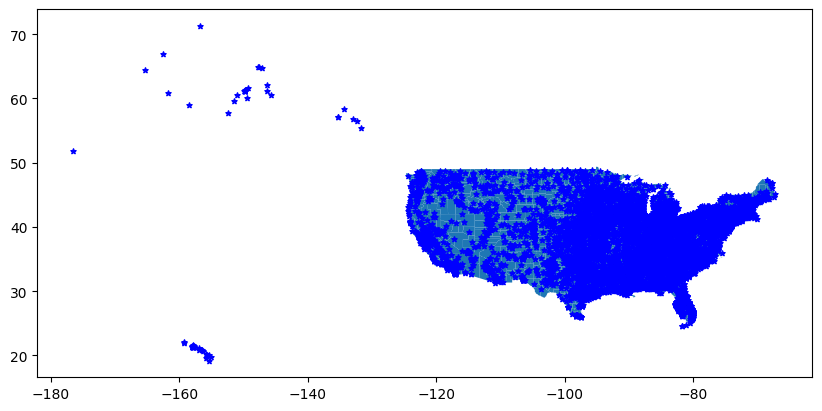

In [79]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

geometry = [Point(xy) for xy in zip(Hospitals['X'], Hospitals['Y'])]
gdf = GeoDataFrame(Hospitals, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(geodatasets.get_path("geoda.natregimes"))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='*', color='blue', markersize=15)

##### Number of hospitals based on state

In [17]:
Hospitals_count=Hospitals[['CITY','STATE']].groupby('STATE').count().sort_values(by='STATE')
Hospitals_count.columns=['Number of Hospitals']
Hospitals_count=Hospitals_count.reset_index()
Hospitals_count.head()

,STATE,Number of Hospitals
0,AK,32
1,AL,133
2,AR,122
3,AZ,142
4,CA,569


In [18]:
Public_school.tail(5)

,X,Y,OBJECTID,NCESID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_METHOD,VAL_DATE,WEBSITE,LEVEL_,ENROLLMENT,ST_GRADE,END_GRADE,DISTRICTID,FT_TEACHER,SHELTER_ID
102365,-83.085229,42.320632,102216,260032201947,COVENANT HOUSE ACADEMY DETROIT - SOUTHWEST SITE,1450 25TH ST,DETROIT,MI,48216,1404,...,IMAGERY,2016-01-13T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,3,202,09,12,2600322,7,NOT AVAILABLE
102366,-83.272599,42.062038,102217,260198003940,FRED W. RITTER ELEMENTARY SCHOOL,5650 CARLETON ROCKWOOD RD,SOUTH ROCKWOOD,MI,48179,9764,...,IMAGERY,2010-06-04T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,291,KG,04,2601980,17,NOT AVAILABLE
102367,-88.914089,30.436478,102218,280177000284,DIBERVILLE ELEM,4540 BRODIE ROAD,DIBERVILLE,MS,39540,NOT AVAILABLE,...,IMAGERY,2013-05-28T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,761,KG,03,2801770,40,NOT AVAILABLE
102368,-94.558365,39.187941,102219,292280001267,DAVIDSON ELEM.,5100 N HIGHLAND,KANSAS CITY,MO,64118,6049,...,IMAGERY/OTHER,2016-07-18T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,404,PK,05,2922800,22,NOT AVAILABLE
102369,-93.291370,37.220353,102220,292886001480,JUVENILE JUSTICE CTR.,1111 N ROBBERSON,SPRINGFIELD,MO,65802,3842,...,IMAGERY/OTHER,2016-07-25T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,3,0,07,12,2928860,2,NOT AVAILABLE


In [19]:
Public_school['STATE'].unique()

array(['FL', 'LA', 'ME', 'MS', 'MO', 'NE', 'NV', 'NJ', 'NM', 'NY', 'NC',
       'OH', 'OR', 'RI', 'SD', 'TN', 'TX', 'VA', 'WI', 'PR', 'CA', 'GA',
       'IL', 'IN', 'KS', 'KY', 'MI', 'OK', 'PA', 'AR', 'CO', 'MD', 'MA',
       'MN', 'MT', 'ND', 'AZ', 'WA', 'WY', 'IA', 'AK', 'CT', 'SC', 'UT',
       'ID', 'NH', 'DE', 'HI', 'AL', 'WV', 'VT', 'DC', 'VI'], dtype=object)

In [20]:
non_states = ['PR', 'GU', 'MP', 'AS', 'PW', 'VI']

Public_school=Public_school[~Public_school['STATE'].isin(non_states)]

In [74]:
pip install geopandas

SyntaxError: invalid syntax (2211093158.py, line 2)

In [75]:
pip install geodatasets

  Using cached geodatasets-2023.3.0-py3-none-any.whl (17 kB)
  Using cached pooch-1.8.0-py3-none-any.whl (62 kB)
You should consider upgrading via the '/Users/bikashadhikari/.pyenv/versions/3.8.12/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


<Axes: >

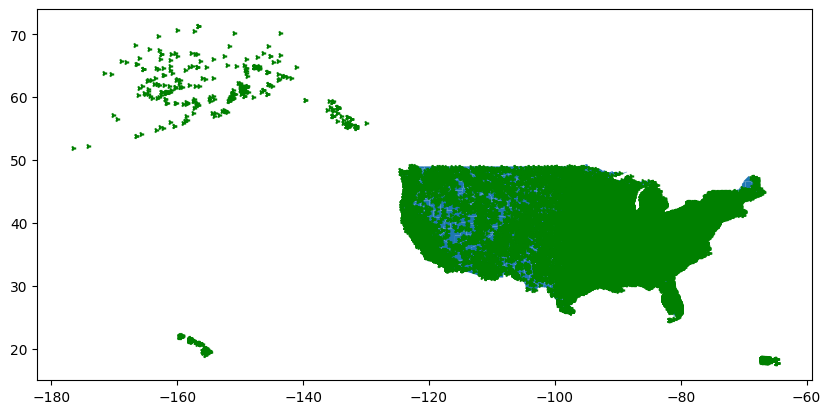

In [76]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

geometry = [Point(xy) for xy in zip(Public_school['X'], Public_school['Y'])]
gdf = GeoDataFrame(Public_school, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(geodatasets.get_path("geoda.natregimes"))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='4', color='green', markersize=15)

In [22]:
Public_school_count=Public_school[['CITY','STATE']].groupby('STATE').count().sort_values(by='STATE')
Public_school_count.columns=['Number of Schools']

In [23]:
Public_school_count=Public_school_count.reset_index()
Public_school_count.head()

,STATE,Number of Schools
0,AK,521
1,AL,1659
2,AR,1122
3,AZ,2467
4,CA,10414


In [25]:
crime_data.head(5)

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"St. Louis city, MO",1791.995377,1,1,4,1612,318667,318667,15,15,...,200,1778,3609,4995,13791,3543,464,318416,29,510
1,"Crittenden County, AR",1754.914968,2,1,4,130,50717,50717,4,4,...,38,165,662,1482,1753,189,28,49746,5,35
2,"Alexander County, IL",1664.700485,3,1,4,604,8040,8040,2,2,...,2,5,119,82,184,12,2,7629,17,3
3,"Kenedy County, TX",1456.310680,4,1,4,2681,444,444,1,1,...,3,1,2,5,4,4,0,412,48,261
4,"De Soto Parish, LA",1447.402430,5,1,4,1137,26971,26971,3,3,...,4,17,368,149,494,60,0,27083,22,31


In [26]:
crime_data['STATE']=crime_data['county_name'].str[-2:]

In [27]:
crime_data['crime_rate_overall']=crime_data['crime_rate_per_100000']/crime_data['population']*100000

In [28]:
Final_data_set=crime_data[['STATE','crime_rate_overall']].groupby('STATE').median()

In [29]:
Final_data_set.columns=['Crime_rate']
Final_data_set=Final_data_set.reset_index()
Final_data_set.head()

,STATE,Crime_rate
0,AK,1474.919002
1,AL,884.788578
2,AR,1262.877963
3,AZ,242.313870
4,CA,186.419570


In [30]:
#Final_data_set=Final_data_set.merge(Public_school_count,left_on='STATE',right_on='STATE')
#Hospitals_count
Final_data_set=Final_data_set.merge(Hospitals_count,left_on='STATE',right_on='STATE')
Final_data_set.head()

,STATE,Crime_rate,Number of Hospitals
0,AK,1474.919002,32
1,AL,884.788578,133
2,AR,1262.877963,122
3,AZ,242.313870,142
4,CA,186.419570,569


In [31]:
prices_of_houses['DATE']=pd.to_datetime(prices_of_houses['DATE'])
prices_of_houses

,DATE,ASPUS
0,1963-01-01,19300.0
1,1963-04-01,19400.0
2,1963-07-01,19200.0
3,1963-10-01,19600.0
4,1964-01-01,19600.0
...,...,...
227,2019-10-01,384600.0
228,2020-01-01,383000.0
229,2020-04-01,374500.0
230,2020-07-01,397800.0


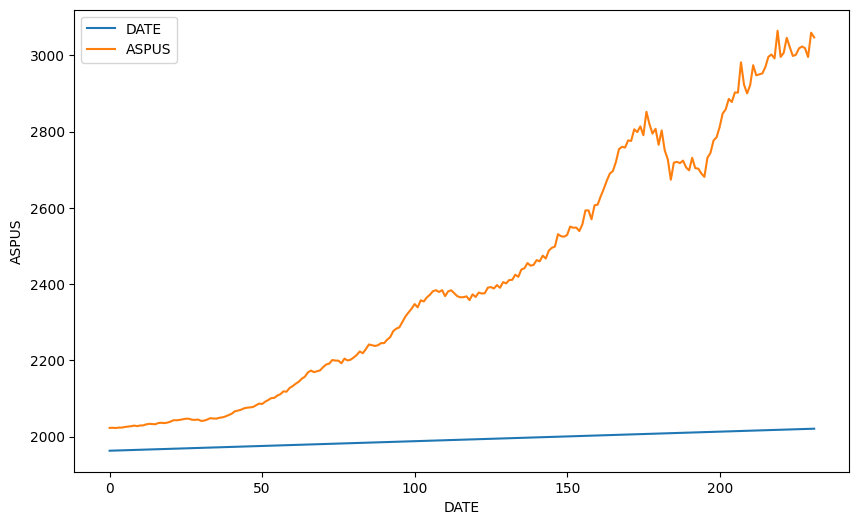

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named House_price_yearly with columns 'Year', 'State', 'Median Home Price', and 'Inflation Rate'
# You may need to adjust column names based on your actual DataFrame

ax = prices_of_houses.plot(kind='line', figsize=(10, 6), marker='')
ax.set_ylabel('ASPUS')
ax.set_xlabel('DATE')
ax.set_title('')

plt.legend()
plt.show()


In [33]:
Average_wages.tail()

,Date,Wage
174,01-09-2020,29.50
175,01-10-2020,29.52
176,01-11-2020,29.61
177,01-12-2020,29.90
178,01-01-2021,29.96


In [34]:
Housing_price_index.tail()

,DATE,CSUSHPISA
403,2020-08-01,222.432
404,2020-09-01,225.608
405,2020-10-01,229.339
406,2020-11-01,232.673
407,2020-12-01,235.627


In [35]:
Newly_built_house.tail()

,Date,House
183,01-10-2019,162
184,01-01-2020,173
185,01-04-2020,159
186,01-07-2020,216
187,01-10-2020,221


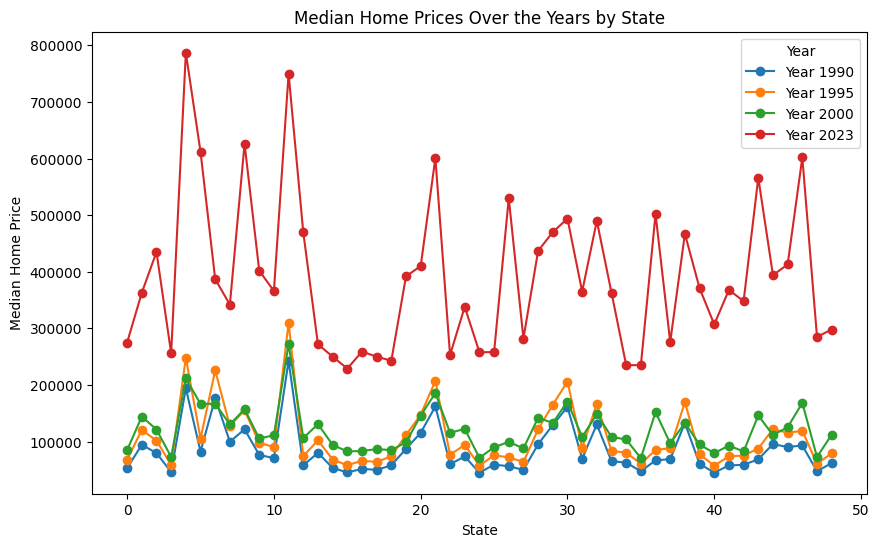

In [36]:
import pandas as pd
import matplotlib.pyplot as plt


ax = House_price_yearly.plot(kind='line', figsize=(10, 6), marker='o')
ax.set_ylabel('Median Home Price')
ax.set_xlabel('State')
ax.set_title('Median Home Prices Over the Years by State')

plt.xticks(rotation=0)
plt.legend(title='Year', loc='upper right')
plt.show()


In [37]:
inflation_rate.head(5)

,Year,Inflation Rate
0,2022,8.0
1,2021,4.7
2,2020,1.2
3,2019,1.8
4,2018,2.4


In [38]:
Final_data_set=Final_data_set.merge(House_price_yearly,left_on='STATE',right_on='St')
Final_data_set=Final_data_set.drop(columns='St')

In [39]:
Final_data_set.rename(columns={'STATE':'ST'},inplace=True)

In [40]:
Final_data_set=Final_data_set[['State','ST','Year 1990','Year 1995','Year 2000','Crime_rate','Number of Hospitals','Year 2023']]
Final_data_set.tail()

,State,ST,Year 1990,Year 1995,Year 2000,Crime_rate,Number of Hospitals,Year 2023
44,Virginia,VA,90400,115498,125400,533.017550,143,413000
45,Vermont,VT,95600,122142,111500,304.723002,18,394000
46,Washington,WA,93200,119076,168300,293.093269,133,602000
47,Wisconsin,WI,62100,79341,112200,216.070448,169,298000
48,West Virginia,WV,47600,60815,72800,920.241986,71,285000


In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

In [132]:
details_of_house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [133]:
details_of_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [158]:
df=details_of_house.copy()

In [92]:
df=df[['YearBuilt','LandSlope','Neighborhood','HouseStyle','LotArea','OverallQual','OverallCond','YearRemodAdd','Fireplaces','Heating','FullBath','HalfBath','GarageType','PoolArea','Fence','SaleCondition','SalePrice']]

In [100]:
df=df[['YearBuilt','Neighborhood','HouseStyle','LotArea','OverallQual','YearRemodAdd','Fireplaces','FullBath','HalfBath','Fence','SaleCondition','SalePrice']]

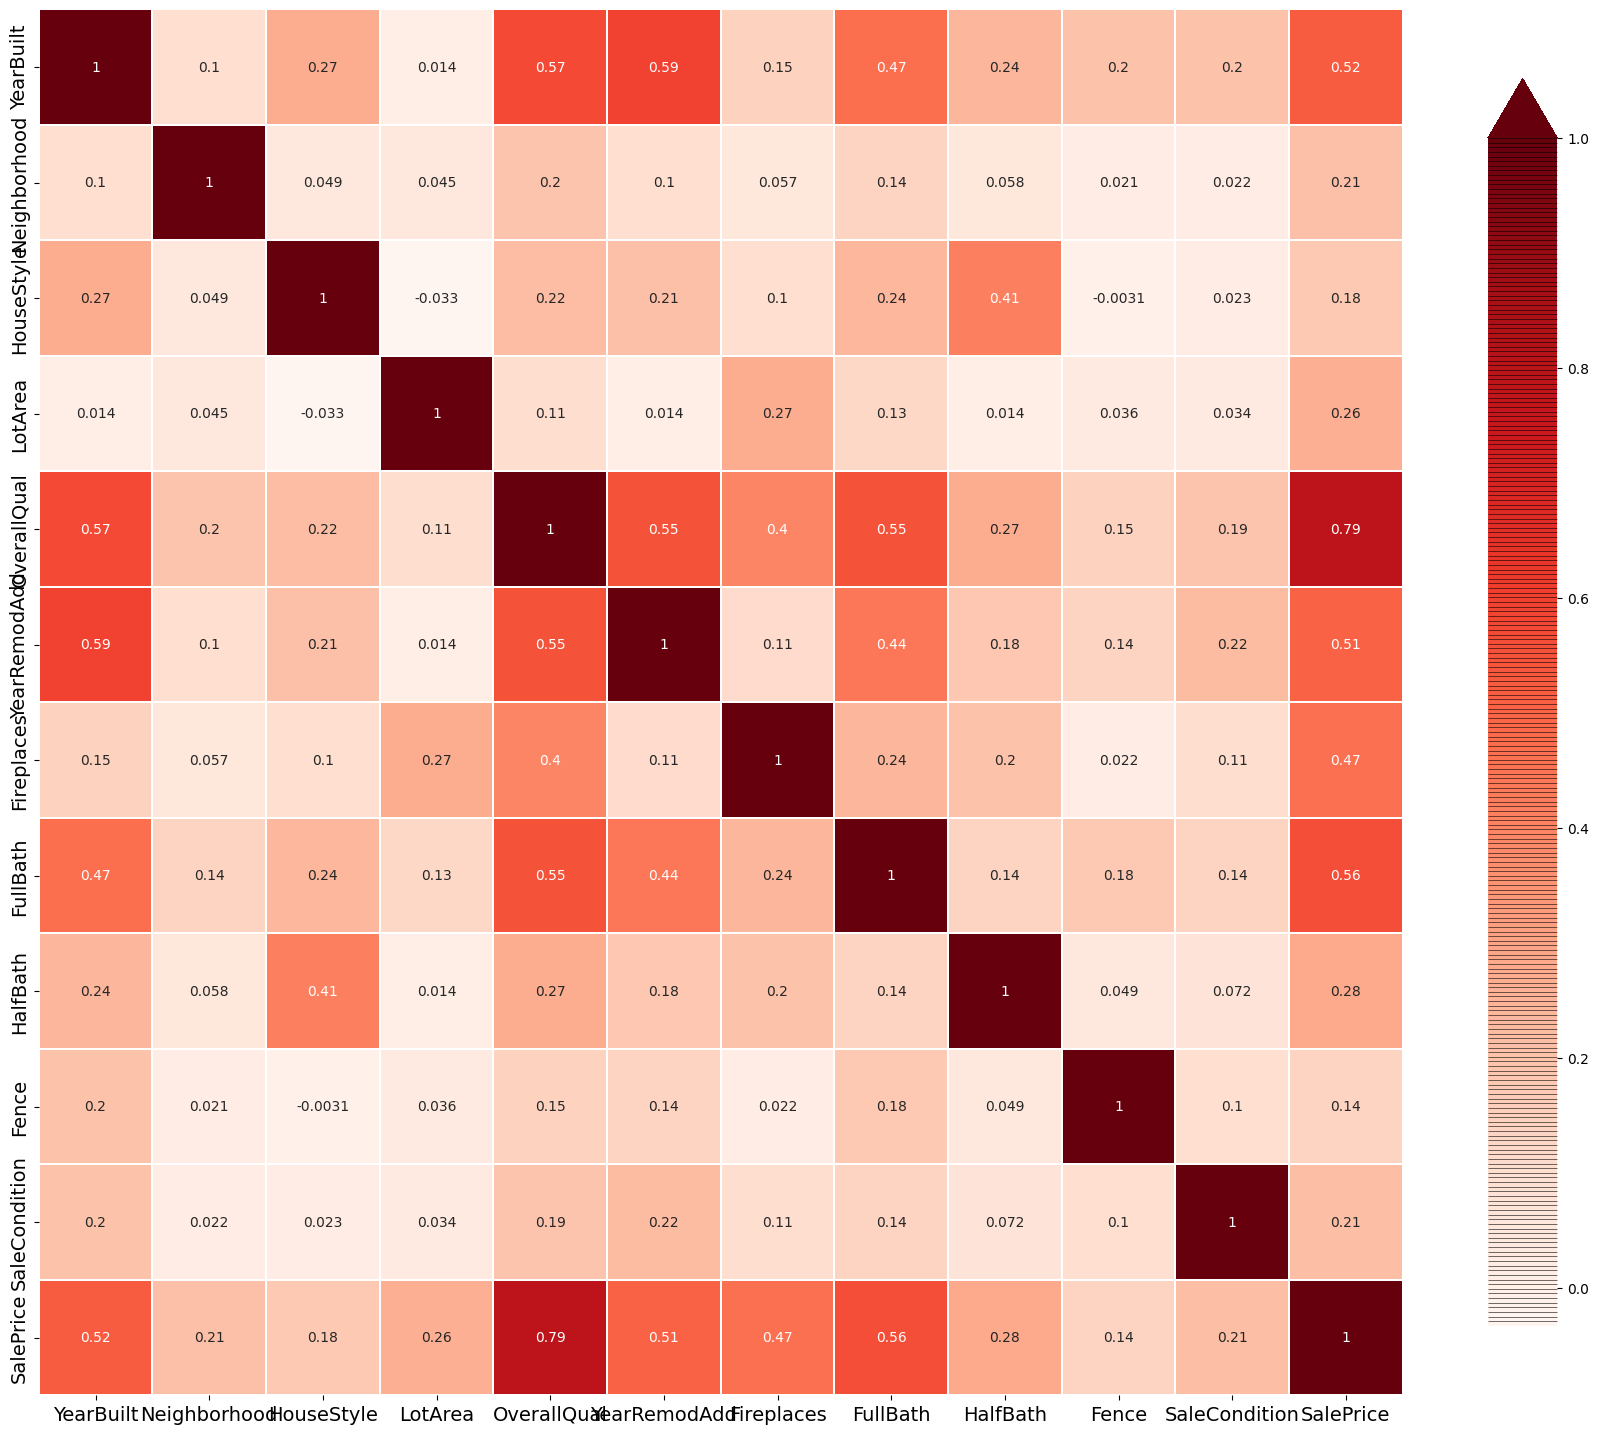

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=[22, 18])

# Specify color bar settings
cbar_kws = {
    'orientation': 'vertical',
    'shrink': 0.9,
    'extend': 'max',
    'extendfrac': 0.05,
    'drawedges': True,
    'pad': 0.05,
    'aspect': 18
}

# Create the heatmap
sns.heatmap(df.corr(), annot=True, cmap='Reds', linecolor='w', linewidth=0.2, cbar_kws=cbar_kws)

# Set font sizes for ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Display the plot
plt.show()


In [159]:
details_of_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [173]:
le=LabelEncoder()
for column in df.columns:
    if df[column].dtype=='object':
        df[column]=le.fit_transform(df[column])

In [174]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [175]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        df[column]=df[column].fillna(df[column].mean(), inplace=True)

In [243]:
df_x = df.drop(columns='SalePrice')
df_y = df['SalePrice']
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,random_state=33)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(f"Mean absolute error of model is {mean_absolute_error(y_pred,y_test)}")

Mean absolute error of model is 18586.931726027397


In [244]:
model = XGBRegressor(eval_metric='logloss')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = mean_absolute_error(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 18286.29


In [119]:
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import sklearn
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [192]:
%%time
LR = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=33)
RF = RandomForestRegressor(n_estimators = 100, random_state=33)
SVM = SVR()
KNC = KNeighborsRegressor()
DTC = DecisionTreeRegressor()
ABC = AdaBoostRegressor(n_estimators = 100)
BC = BaggingRegressor(n_estimators = 100)
GBC = GradientBoostingRegressor(n_estimators = 100)
# clf_XGB = XGBClassifier(n_estimators = 100, objective= 'binary:logistic', seed=555, use_label_encoder=False)
clf_XGB = XGBRegressor(n_estimators = 100, seed=555, use_label_encoder=False, eval_metric='logloss')
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([RF, KNC, DTC, ABC, BC, GBC, clf_XGB],
                      [
                       'Random Forest',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']):
    md = clf.fit(x_train, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (sklearn.metrics.mean_absolute_error(clf.predict(x_test), y_test)),label)

5-fold cross validation:

Test Accuracy: 32920.5205  Logistic Regression
Test Accuracy: 18742.7336  Random Forest
Test Accuracy: 23740.8345  KNeighbors
Test Accuracy: 29171.5041  Decision Tree
Test Accuracy: 24142.2254  Ada Boost
Test Accuracy: 18930.1355  Bagging
Test Accuracy: 16666.4719  Gradient Boosting
Test Accuracy: 18286.2924  XGBoost
CPU times: user 31 s, sys: 3.07 s, total: 34.1 s
Wall time: 6.69 s


In [241]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)

In [235]:
importances = pd.Series(clf_XGB.feature_importances_, index=df_x.columns).sort_values(ascending=False)
Feature_Importances=pd.DataFrame(importances).reset_index()
Feature_Importances.columns=['columns','value']
df_new=df[Feature_Importances[Feature_Importances['value']>=0.004]['columns']]

Feature Importances:


In [251]:
df_x = df_new
df_y=df['SalePrice']

In [252]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,random_state=555)

In [254]:
%%time
RF = RandomForestRegressor(n_estimators = 100, random_state=33)
SVM = SVR()
KNC = KNeighborsRegressor()
DTC = DecisionTreeRegressor()
ABC = AdaBoostRegressor(n_estimators = 100)
BC = BaggingRegressor(n_estimators = 100)
GBC = GradientBoostingRegressor(n_estimators = 100)
# clf_XGB = XGBClassifier(n_estimators = 100, objective= 'binary:logistic', seed=555, use_label_encoder=False)
clf_XGB = XGBRegressor(n_estimators = 100, seed=555, use_label_encoder=False, eval_metric='logloss')
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([RF, KNC, DTC, ABC, BC, GBC, clf_XGB],
                      [
                       'Random Forest',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']):
    md = clf.fit(x_train, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (sklearn.metrics.mean_absolute_error(clf.predict(x_test), y_test)),label)

5-fold cross validation:

Test Accuracy: 16858.4954  Random Forest
Test Accuracy: 27072.5732  KNeighbors
Test Accuracy: 24513.6329  Decision Tree
Test Accuracy: 23176.5824  Ada Boost
Test Accuracy: 17102.9457  Bagging
Test Accuracy: 17173.7252  Gradient Boosting
Test Accuracy: 19780.9277  XGBoost
CPU times: user 2.87 s, sys: 367 ms, total: 3.23 s
Wall time: 1.17 s


In [255]:
df_x

,OverallQual,CentralAir,GarageCars,GrLivArea,BsmtQual,TotalBsmtSF,2ndFlrSF,BsmtCond,KitchenAbvGr,1stFlrSF,GarageType,KitchenQual,Fireplaces,FullBath,BsmtFinSF1,MSZoning,OverallCond,YearRemodAdd
0,7,1,2,1710,2,856,854,3,1,856,1,2,0,2,706,3,5,2003
1,6,1,2,1262,2,1262,0,3,1,1262,1,3,1,2,978,3,8,1976
2,7,1,2,1786,2,920,866,3,1,920,1,2,1,2,486,3,5,2002
3,7,1,3,1717,3,756,756,1,1,961,5,2,1,1,216,3,5,1970
4,8,1,3,2198,2,1145,1053,3,1,1145,1,2,1,2,655,3,5,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1,2,1647,2,953,694,3,1,953,1,3,1,2,0,3,5,2000
1456,6,1,2,2073,2,1542,0,3,1,2073,1,3,2,2,790,3,6,1988
1457,7,1,1,2340,3,1152,1152,1,1,1188,1,2,2,2,275,3,9,2006
1458,5,1,1,1078,3,1078,0,3,1,1078,1,2,0,1,49,3,6,1996
